/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


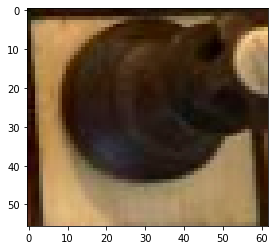

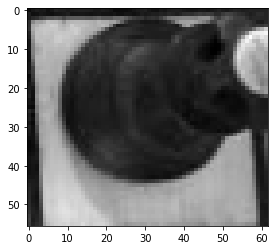

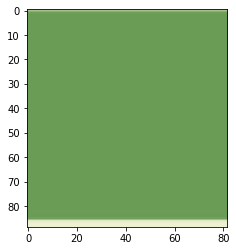

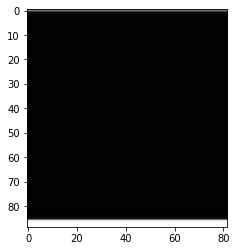

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
print(os.getcwd())

BoW = cv2.imread('.././photos_test/square/black_on_white_g.png',1)
BoW_c = cv2.cvtColor(BoW, cv2.COLOR_BGR2RGB)
BoW_g = cv2.imread('.././photos_test/square/black_on_white_g.png',0)
plt.imshow(BoW_c)
plt.show()
plt.imshow(BoW_g, cmap = 'gray')
plt.show()

Black_square = cv2.imread('.././photos_test/square/black_c.png',1)
B_c = cv2.cvtColor(Black_square, cv2.COLOR_BGR2RGB)
B_g = cv2.imread('.././photos_test/square/black_c.png',0)
plt.imshow(B_c)
plt.show()
plt.imshow(B_g, cmap = 'gray')
plt.show()


In [18]:
def get_gradient(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)

    mag = np.sqrt(gx**2 + gy**2)
    mean_gradient = np.mean(mag)

    print("Le gradient moyen de l'image est : ", round(mean_gradient, 1))
    return mean_gradient

get_gradient(BoW_g)
get_gradient(B_g)

Le gradient moyen de l'image est :  24.3
Le gradient moyen de l'image est :  2.9


2.898876404494382

In [19]:
def is_piece_in_square(img, treshold=10):
    return get_gradient(img) > treshold

In [20]:
def show_img_and_piece_presence(img):
    if is_piece_in_square(img):
        title = 'There is a piece in this square :'
    else :
        title = "There isn't any piece in this square :"
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

Le gradient moyen de l'image est :  2.9


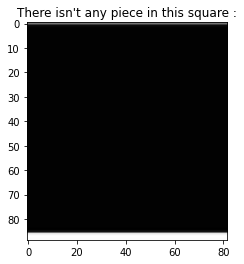

Le gradient moyen de l'image est :  24.3


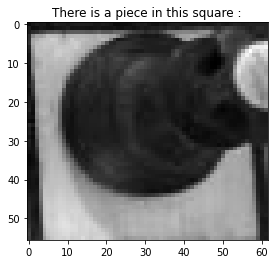

In [21]:
show_img_and_piece_presence(B_g)
show_img_and_piece_presence(BoW_g)